# Project 1: Comprehensive Customer Churn Prediction

## Project Overview

In this project activity, you will dive into analyzing customer data from a business to predict churn risk comprehensively. You will not only apply traditional supervised learning algorithms such as decision trees and random forests but also explore logistic regression, support vector machines (SVMs), and k-nearest neighbors (KNN) to identify key churn factors. This expanded scope will enhance your understanding of different model assumptions, strengths, and weaknesses, enabling you to build a robust model to target potential churners effectively.

In this project, you will:
- **Evaluate** different supervised learning algorithms to understand their suitability for churn prediction.
- **Implement** data preprocessing techniques tailored to the requirements of each algorithm.
- **Optimize** model parameters to improve prediction accuracy.
- **Interpret** the model outcomes to extract actionable insights for retention campaigns.

**Estimated Completion Time**

12 to 14 hours


### Task 1: Initial Data Exploration

**Objective:** Load the dataset and perform an initial examination to understand its structure and identify any immediate cleaning needs.

**Activities:**

1. Load the dataset using pandas and display the first few rows to get an initial understanding of the data.
2. Examine the dataset's shape to understand the scale of the data we're dealing with.
3. Check the data types of each column to identify which are categorical and which are numerical.
4. Identify any missing values in the dataset.
5. Generate summary statistics for numerical columns to identify any immediate anomalies or outliers.


**Estimated Completion Time:** 60 minutes

## Project Information
    Python Version: 3.10.13
    Python Packages: Outlined in pip_requirements.txt
    Dataset: WA_Fn-UseC_-Telco-Customer-Churn.csv (Provided)
    File Authors: Tim Tieng, Scott Mayer

In [23]:
# Import Packages: 
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms, Modeling and preprocessing packages
import feature_engine
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Deep Learning
import keras

In [2]:
# Obtain - Read in the data, convert to PD Dataframe, and perform initial inspection of the dataset
churn_file = pd.read_csv('../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df = pd.DataFrame(churn_file)

# Initial inspect - Provde information on Attribute Names, Non-Null Count, Data Types, Memory Usage
churn_df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Initial Data Observations:
    
1. Rows/Observations: 7043 
2. Attributes/Columns: 21
3. Datatypes Present: int64(2x), float64(1x), string objects(18x)
4. Memory Usage - 7.8 MB (Small)

**Hints:**

* Use `pd.read_csv()` to load the dataset. Remember to `import pandas as pd`.
* Use `.head()`, `.info()`, `.dtypes`, `.isnull().mean()`, and .`describe()` methods to explore the dataset.

## Data Cleaning

In [3]:
churn_df['TotalCharges'].replace(' ', 0, inplace=True)

/var/folders/55/ln_tx97d091c99tgj4hbb_kr0000gn/T/ipykernel_3115/337199043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_df['TotalCharges'].replace(' ', 0, inplace=True)


In [4]:
# Data Cleaning - Changing 'SeniorCitizen' column to string because it is a categorical column encoded as a number
# Will convert back to numerical encoding with other categorical columns 

churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].astype('str')
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'])
churn_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Intial Inspection of data using head()
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Check for null Values - percentage per column
churn_df.isna().mean().sort_values(ascending= False)
# No null values 

customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64

In [7]:
# Desriptive Statistics -Numerical Attributes
churn_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [8]:
# Descriptive Statistics - Categorical Values included
churn_df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,2,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,0,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,5901,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


### Churn Data Frame Observerations
1. Gender Distribution - Dataset has 7043 total observations with only two unique values (Male, Female). Right now there are 3555 Male values Which suggest the data is relatively balanced. 
2. Senior Citizen Attribute (Prior to DT casting) - The mean value is .162 which can be translated as 16.2 of the userbase is classified as a senior citizen. Additional definition of what describes a Senior Citizen mayh be needed for future analysis (what age classifies senior citizen cut off?)
3. Tenure - Mean value is about 32.4% with a min value of 0 months and max months membership of 72 months. STD is 24.6 which can be viewed as a wide variance in the quartiles.
4. XService Attributes - This showcases that this one company has multiple offerings  that can appeal to different customer bases. From a business perspective, we may need to study customer propensity to include one service based on the services the customer currently pays for. This can increase market capture for the business writ-large. (Bundling services to a subscription)
5. InternetService - Fiber Optic is the most frequent value in this column representing that almost half of the customer base pays for fiber optic services. This could be a business opportunity to focus on members with lower levels of internet service to upgrade potentially reducing the likliness of leaving our service for a competitor.
5. Churn - Top value is "no" with a frequency count of 5174/7043. This attribute should be used in future analysis

---
---

### Task 2: Exploratory Data Analysis (EDA)

**Objective:** Use statistical analysis and visualization techniques to uncover insights and identify patterns related to custom	er churn.

**Activities:**

1. **Visualize distribution of numerical features** to identify any skewed data or outliers.
2. **Analyze churn rate by categorical features** to uncover any patterns that may indicate a higher likelihood of churn.
3. **Examine relationships between features** using correlation matrices and scatter plots for numerical features, and stacked bar charts for categorical features against churn.
4. **Use box plots to identify outliers** in numerical data and understand distributions across churned and retained customers.
5. **Create a pair plot** to visualize the pairwise relationships and distributions of numerical features segmented by churn.


**Estimated Completion Time:** 90 minutes


**Hints:**

* Use `sns.histplot()` for distributions, `sns.countplot()` for categorical data analysis, `sns.heatmap()` for correlation matrices, `sns.boxplot()` for outliers, and `sns.pairplot()` for pairwise relationships.
* Remember to import necessary libraries like `seaborn as sns` and `matplotlib.pyplot as plt`.


In [10]:
# EDA - Initial Visualizations on Numerical Data. Create a funciton that will do this in one step

def visualize_numerical_histograms(df):
    """
    Purpose - A function that takes in a dataframe and returns histograms on the dataframe's numerical values. 
              This helps with Exploratory Data Analysis (EDA).
    Parameters - Pandas Dataframe
    Returns - Nothing
    Prints - Histograms to highlight distributions
    """
    # Create numerical only dataframe based on datatypes in the info() output
    numerical_only_df = churn_df.select_dtypes(include=['float64', 'int64'])

    # Iterate
    for column in numerical_only_df.columns:
        # format the visualization
        plt.figure(figsize=(10,6))
        sns.histplot(data=numerical_only_df, x=column, kde=True, bins= 20)
        plt.title(f"Distribution of {column} Column of Churn Dataset")
        plt.xlabel = column
        plt.ylabel = 'Frequency'
        plt.show()


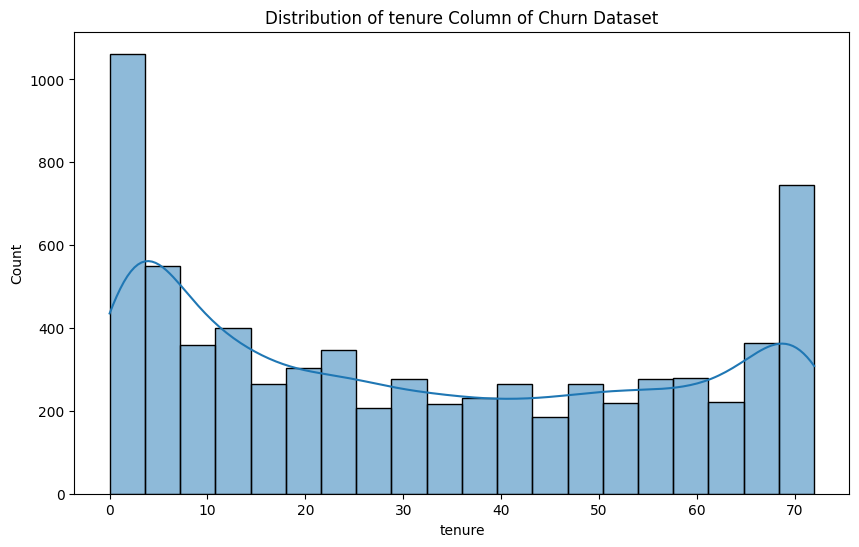

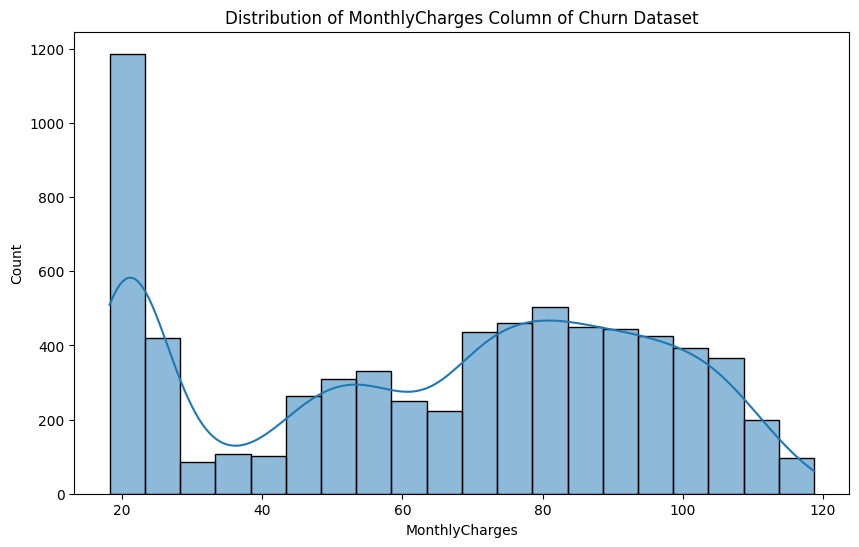

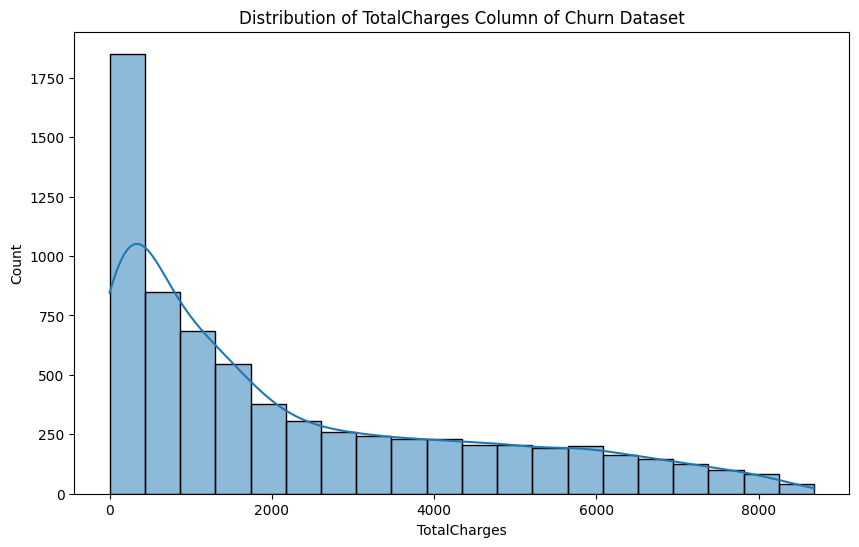

In [11]:
# Test and Verifify
visualize_numerical_histograms(churn_df)

### Histogram Observations
1. **Tenure Distribution**: There are two distinct peaks for this attribute, alluding to that the current customer base are either new OR customers that churn quickly. The center dip in the graph may allude to the typical range where churn is likely to happen
2. **MonthlyCharges Distribution**: Visually, there is a right skew to this column. There also seems to be a lot of customers who are only paying for $20 for services. This may highlight that these customers are only paying for a single service (internet, phone, etc). From a business/market capture perspective, we can view this as potential customer base to target with the goal of motivating them to add more services to their subscription. The right end of the graph may represent customers who pay for premium-like services or combines multiple service offerings to their subscription. 
3. **TotalCharges Distributio**n**: This attribute has a long trailing tail towards the right of the graph. Additionally, there are alot of customers with a low "TotalCharges" value. This is aligned with teh MonthlyCharges column and may be attributed to the customer base only paying for 1 service. 

**Business Significance**: The three graphs shows information abou the current customer base. It seems as though there are two "populations" in the customer base: Customers who are new, and customers who pay for multiple services. Based on the dip in the MonthlyCharges Distribution, this could be viewed as our customberbase we should focus on.

### Numerical Columns: Anderson Tests for Skewness

In [24]:
def anderson_skewness_test(df):
  """
  Purpose - Conducts anderson skewness test on numerical columns to determine if column is normally distrubuted
  Parameters - Pandas Dataframe
  Returns - Nothing
  Prints - column name, anderson value, whether or not column is normal 
  """
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  for col in df.select_dtypes(include='number'):
    a = anderson(df[col], dist='norm')
    print(col + "\t", end="")
    if len(col) < 8:
      print("\t", end="")
    print(f'{a.statistic:.2f}', end="\t")
    if a.statistic < a.critical_values[4]:
      print("Normal")
    else:
      print("Not Normal")
  return 

anderson_skewness_test(churn_df)

tenure		203.24	Not Normal
MonthlyCharges	170.56	Not Normal
TotalCharges	346.64	Not Normal


### Categorical Columns: Categorical Encoding

In [13]:
#TODO put this in a function 
categorical_cols = []
numerical_cols = []
for c in churn_df.columns:
  if churn_df[c].map(type).eq(str).any() or churn_df[c].map(type).eq(str).any():
    categorical_cols.append(c)
  else:
    numerical_cols.append(c)

data_numeric = churn_df[numerical_cols]
data_categorical = pd.DataFrame(churn_df[categorical_cols])

from feature_engine.encoding import CountFrequencyEncoder
encoder = CountFrequencyEncoder(encoding_method='frequency')
encoder.fit(data_categorical)
data_categorical = pd.DataFrame(encoder.transform(data_categorical), columns = data_categorical.columns, index=data_categorical.index) #only apply imputer to numeric columns

data_joined = pd.concat([data_numeric, data_categorical], axis=1)

data_joined.describe(include='all')
data_joined.head()


,tenure,MonthlyCharges,TotalCharges,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,29.85,29.85,0.000142,0.495244,0.837853,0.483033,0.700412,0.096834,0.096834,...,0.496663,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794,0.73463
1,34,56.95,1889.50,0.000142,0.504756,0.837853,0.516967,0.700412,0.903166,0.481329,...,0.286668,0.438450,0.343888,0.493114,0.398978,0.395428,0.209144,0.407781,0.228880,0.73463
2,2,53.85,108.15,0.000142,0.504756,0.837853,0.516967,0.700412,0.903166,0.481329,...,0.286668,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.228880,0.26537
3,45,42.30,1840.75,0.000142,0.504756,0.837853,0.516967,0.700412,0.096834,0.096834,...,0.286668,0.438450,0.343888,0.290217,0.398978,0.395428,0.209144,0.407781,0.219225,0.73463
4,2,70.70,151.65,0.000142,0.495244,0.837853,0.516967,0.700412,0.903166,0.481329,...,0.496663,0.438450,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794,0.26537


In [17]:
# Visualize Box Plots
def create_boxplots(df):
    """
    Purpose - To create boxplots of a given dataframe
    Parameters - Pandas Dataframe
    Returns - Nothing
    Prints - Boxplots for the provided pandas Dataframe that can be used for Exploratory Data Analysis (EDA)
    """
    # Create numerical only dataframe
    numerical_only_df = churn_df.select_dtypes(include=['float64', 'int64'])
    # Base figure width that can be  scale based on the range of the data
    base_width = 5
    max_width = 15 # added to resolve ValueError: Image size of 217119x400 pixels is too large. It must be less than 2^16 in each direction.

    # Iterate over each column
    for column in numerical_only_df:
        # Calculate the range of the column data
        data_range = numerical_only_df[column].max() - numerical_only_df[column].min()
        
        # Scale the figure width, we use max to ensure a minimum width is maintained
        figure_width = min(max(base_width, base_width * (data_range / 20)), max_width)  # Updated as part of max_width 
        
        # Create a figure with the adjusted size
        plt.figure(figsize=(figure_width, 4))  # Height is kept constant
        plt.title(f'Boxplot for {column} Attribute')
        sns.boxplot(x=df[column], orient='h')
        
        plt.show() 

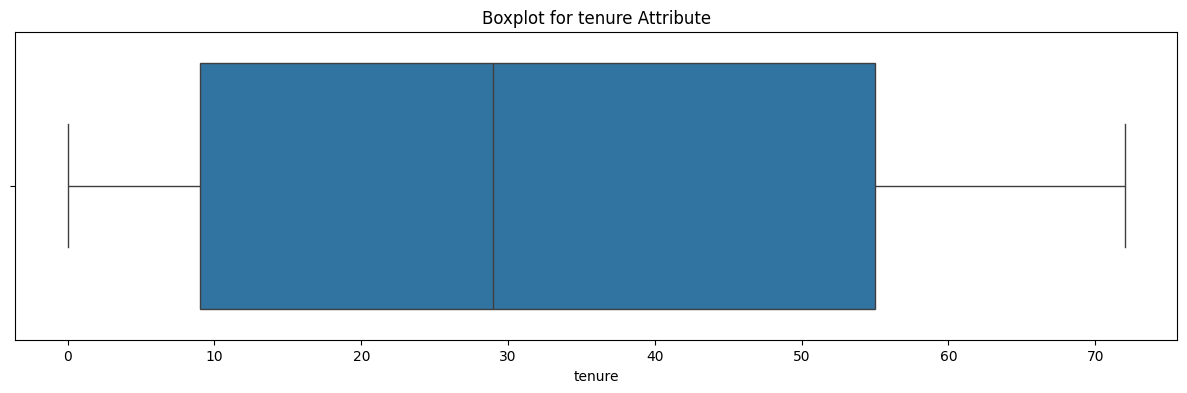

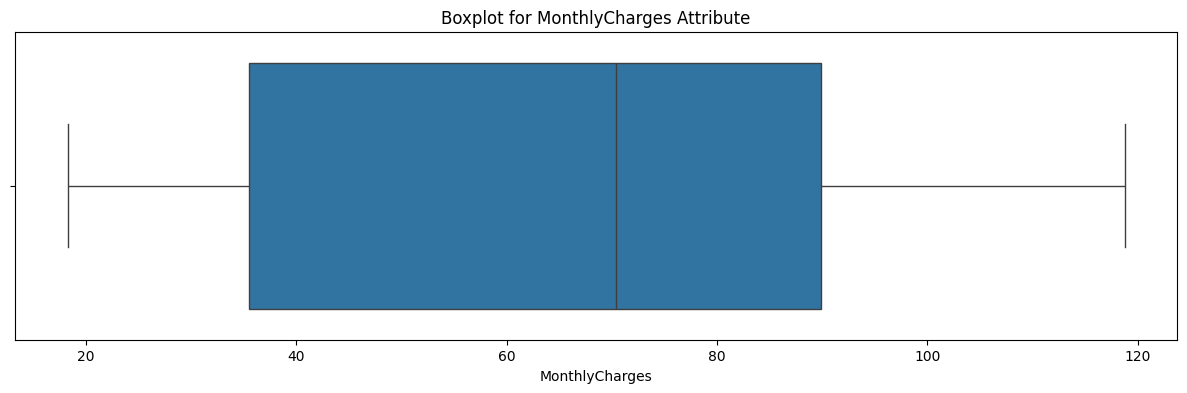

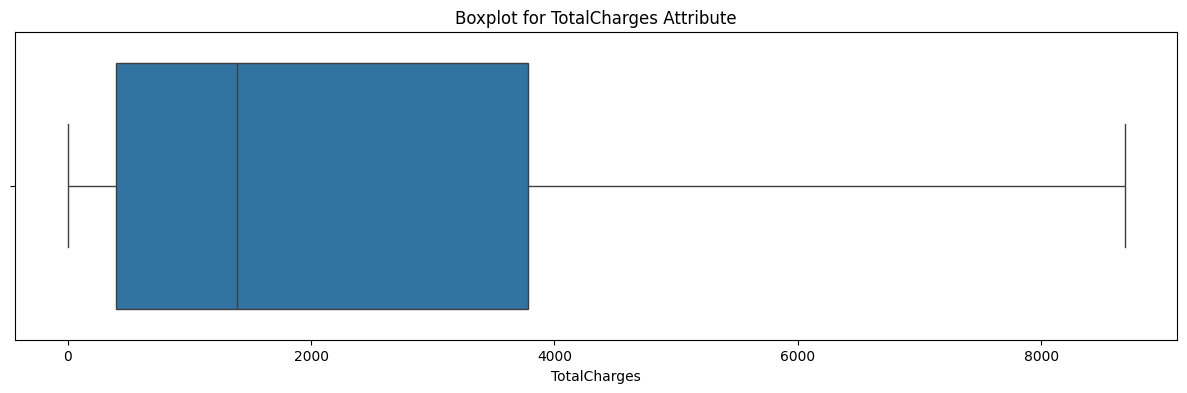

In [18]:
create_boxplots(churn_df)

### Boxplot Observations
1. **SeniorCitizen (Prior to casting)** - There seems to be an outlier that returns an ineffective boxplot. I need to create a function that can handle outliers. I originally thought handling the figure width was needed to resolve the error. 
2. **Tenure Boxplot** : This attrribute looks relatively uniform. This graph visually describes the customers who been wiht the services for a long time
3. **MonthlyCharges Boxplot**: The median placement on the graph confirms the right skew nature from the histogram. This plot also confirms the observation that customers tend to have lower monthly charges or are paying for single services vs bundling services
4. **TotalCharges Boxplot**: The skewness of this attribute is more apparent in the boxplot. The median value represents that half of the customer base is clustered towards the lower end of charges. Potential outliers as indicated by the long tail on the right side of the plot

In [19]:
# Correlation matrix and heatmap visualization
correlation_matrix = churn_df.corr(numeric_only=True)
correlation_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


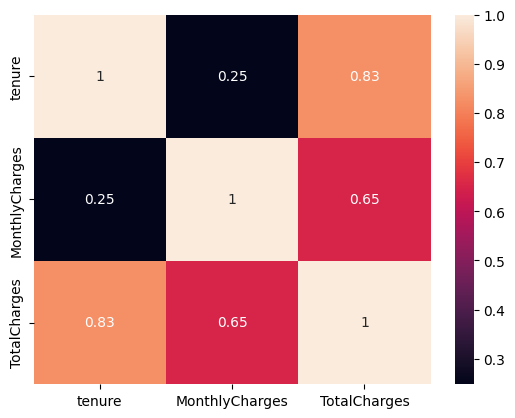

In [20]:
# Heatmap visualization of the correlation matrix 
# Purpose of visualizing Correlation Matrix - To see the relationships more apparently 
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Correlation Matrix and Heatmap Observations:
1. There are positive relationships amongst the 3 numerical attributes.
2. **SeniorCitizen vs Tenure (Prior to Casting)e** = The value is so close to 0 that it alludes to there is no relationship at all between these two attributes 
3. Tenure vs Monthly Charges - There is a slightly positive relationship between these two attributes. This suggests that as tenure increases, monthyl charges also increase slightly since they are positively correlated, although weak. This is an interesting anamoly as businesses tend to "reward" long-term customers or value their business throughout the years. This could be the business' approach to handle inflation.

In [21]:
def chi_squared_test(df, target):
    """
    Purpose - to assist in EDA on categorical data. This function performs a Chi-squared test on all all categorical 
            attributes in a df against the target variable.
    Target Variable - 'Churn'
    Parameters- pandas dataframe with numerical and categorical data
    Return - results of the chi2 test in the 'results' variable
    Prints - The Chi-squared statistic and p-value for each pair of categorical columns.
    """
    # Select Object dt based off the output from info()
    categorical_cols = df.select_dtypes(include=['object']).columns
    significant_results = []

    # Check if 'Churn' Column is present. If not, prompt the user
    if target not in categorical_cols:
        print(f"The target variable {target} is not found. Please verify")
        return significant_results

    # Perform a Chi-squared test for each pair of categorical variables
    for col in categorical_cols:
        if col == target:
            continue
        # Create a contingency table
        contingency_table = pd.crosstab(df[col], df[target])

        # Perform the Chi-squared test - chi2 value, p value, degrees of freedom and expected frequencies if null hypothesis were true
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Save the result IF p value is less than or equal to 0.05 - Statistically significant
        if p <= 0.05:
            significant_results.append({
                'Column 1': col,
                'Chi-squared Statistic': chi2,
                'p-value': p
            })

            # Output the result
            print(f"Chi-squared test for {col} and {target}")
            print(f"Chi-squared Statistic: {round(chi2,2)}, p-value: {round(p,4)}\n")

    return significant_results

In [23]:
# Test by calling the function
chi_squared_test(churn_df, 'Churn')

Chi-squared test for SeniorCitizen and Churn
Chi-squared Statistic: 159.43, p-value: 0.0

Chi-squared test for Partner and Churn
Chi-squared Statistic: 158.73, p-value: 0.0

Chi-squared test for Dependents and Churn
Chi-squared Statistic: 189.13, p-value: 0.0

Chi-squared test for MultipleLines and Churn
Chi-squared Statistic: 11.33, p-value: 0.0035

Chi-squared test for InternetService and Churn
Chi-squared Statistic: 732.31, p-value: 0.0

Chi-squared test for OnlineSecurity and Churn
Chi-squared Statistic: 850.0, p-value: 0.0

Chi-squared test for OnlineBackup and Churn
Chi-squared Statistic: 601.81, p-value: 0.0

Chi-squared test for DeviceProtection and Churn
Chi-squared Statistic: 558.42, p-value: 0.0

Chi-squared test for TechSupport and Churn
Chi-squared Statistic: 828.2, p-value: 0.0

Chi-squared test for StreamingTV and Churn
Chi-squared Statistic: 374.2, p-value: 0.0

Chi-squared test for StreamingMovies and Churn
Chi-squared Statistic: 375.66, p-value: 0.0

Chi-squared test 

[{'Column 1': 'SeniorCitizen',
  'Chi-squared Statistic': 159.42630036838742,
  'p-value': 1.510066805092378e-36},
 {'Column 1': 'Partner',
  'Chi-squared Statistic': 158.7333820309922,
  'p-value': 2.1399113440759935e-36},
 {'Column 1': 'Dependents',
  'Chi-squared Statistic': 189.12924940423474,
  'p-value': 4.9249216612154196e-43},
 {'Column 1': 'MultipleLines',
  'Chi-squared Statistic': 11.33044148319756,
  'p-value': 0.0034643829548773},
 {'Column 1': 'InternetService',
  'Chi-squared Statistic': 732.309589667794,
  'p-value': 9.571788222840544e-160},
 {'Column 1': 'OnlineSecurity',
  'Chi-squared Statistic': 849.9989679615965,
  'p-value': 2.661149635176552e-185},
 {'Column 1': 'OnlineBackup',
  'Chi-squared Statistic': 601.812790113409,
  'p-value': 2.0797592160864276e-131},
 {'Column 1': 'DeviceProtection',
  'Chi-squared Statistic': 558.419369407389,
  'p-value': 5.505219496457244e-122},
 {'Column 1': 'TechSupport',
  'Chi-squared Statistic': 828.1970684587394,
  'p-value': 1

### Chi-Squared On Categorical Values Observations

- To identify the relationship between categorical values and our target variable of "Churn", we created a function to run the chi-squared test on our dataframe.
- Low p-values across the attributes, confirming strong rejection of the null hypothesis
- These attributes may have strong predicitve power in our future modeling

**Attributes with strong Association with 'Churn' (Chi Statistic values are 500 or greater)**
1.  InternetService
2.  OnlineSecurity
3.  OnlineBackup
4.  DeviceProtection
5.  TechSupport
6.  PaymentMethod
7.  Contract

### Cramer's V-Test on Categorical Values

In [38]:
# Cramers-V Test Function Version 2
def cramers_v(confusion_matrix):
    """
    Purpose: Calculates Cramer's V statistic for categorical variables.
    Parameters: 
        x = first categorical Value
        y = second categorical value
    Returns: Cramer's V value
    """
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()  # Total observations
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [39]:
def calculate_cramers_v_for_attributes(df, attributes):
    """
    Purpose: To assess the relationship between each pair of categorical attributes.
    Parameters:
        df: pandas DataFrame containing the data.
        attributes: list of column names of potential categorical variables.
    Returns:
        A dictionary with key as attribute pairs and value as Cramer's V statistic.
    """
    cramers_v_results = {}
    for i, attr1 in enumerate(attributes):
        for attr2 in attributes[i+1:]:
            confusion_matrix = pd.crosstab(df[attr1], df[attr2])
            cramers_v_value = cramers_v(confusion_matrix)
            cramers_v_results[(attr1, attr2)] = cramers_v_value

    return cramers_v_results

In [40]:
# Test
potential_attributes = ['InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'PaymentMethod', 'Contract' ]
cramers_v_results = calculate_cramers_v_for_attributes(churn_df, potential_attributes)
for pair, value in cramers_v_results.items():
    print(f"Cramer's V for {pair}: {value:.4f}")

Cramer's V for ('InternetService', 'OnlineSecurity'): 0.7244
Cramer's V for ('InternetService', 'OnlineBackup'): 0.7071
Cramer's V for ('InternetService', 'DeviceProtection'): 0.7070
Cramer's V for ('InternetService', 'TechSupport'): 0.7228
Cramer's V for ('InternetService', 'PaymentMethod'): 0.3125
Cramer's V for ('InternetService', 'Contract'): 0.2063
Cramer's V for ('OnlineSecurity', 'OnlineBackup'): 0.7183
Cramer's V for ('OnlineSecurity', 'DeviceProtection'): 0.7172
Cramer's V for ('OnlineSecurity', 'TechSupport'): 0.7330
Cramer's V for ('OnlineSecurity', 'PaymentMethod'): 0.3043
Cramer's V for ('OnlineSecurity', 'Contract'): 0.3009
Cramer's V for ('OnlineBackup', 'DeviceProtection'): 0.7190
Cramer's V for ('OnlineBackup', 'TechSupport'): 0.7197
Cramer's V for ('OnlineBackup', 'PaymentMethod'): 0.2818
Cramer's V for ('OnlineBackup', 'Contract'): 0.2581
Cramer's V for ('DeviceProtection', 'TechSupport'): 0.7264
Cramer's V for ('DeviceProtection', 'PaymentMethod'): 0.2863
Cramer's V

### Cramer's V Interpretation

Notes - Cramer's V is used to assess the strength of association between pairs of categorical values in our churn_df. Cramer's V helps identify potentially redundant features
If we chose two independent variables that have strong associations to each other, the model may bias towards those attributes, affecting our predicitve power.

V-Values range from approximately 0.2 - 0.7.

[]

---
---

### Task 3: Data Preprocessing

**Objective:** Split the dataset into training and testing sets, then clean the training dataset by handling missing values, outliers, and duplicate entries using `feature_engine` to prepare for further analysis.

**Activities:**

1. **Split the dataset into training and testing** sets to ensure a fair evaluation of the model built on processed data.
2. **Handle missing values** in the training set using appropriate imputation techniques.
3. **Identify and treat outliers** in numerical features of the training set to minimize their impact.
4. **Check for and remove constant and duplicate entries** in the training set to maintain data integrity.
5. **Apply the same preprocessing steps** (imputation, outlier handling) to the test set using parameters derived from the training set to maintain consistency and prevent data leakage.

**Estimated Completion Time:** 90 minutes

***Note:*** *The splitting of the dataset into training and testing sets before preprocessing is a best practice in machine learning. This approach ensures that the model is evaluated on unseen data that has been processed in the same way as the training data, without using information from the test set during the training phase.*



**Hints:**

* Use `train_test_split` from `sklearn.model_selection` to split your data.
* Handle numerical missing values with pandas `.fillna()`, sklearn's `SimpleImputer` or feature-engine's `MeanMedianImputer`.
* Detect and handle outliers by calculating IQR or using feature_engine's Winsorizer.
* Remove duplicates using DataFrame's `.drop_duplicates()` method or feature-engine's `DropDuplicateFeatures()` class.

In [ ]:
# Create a copy of the original data fram for emergency scenarios
churn_original = churn_df.copy()

# Isolate target variable to its own variable with all column values
target = churn_df['Churn']

# Drop Columns
churn_dropped = churn_df.drop(columns=['Churn', 'customerID', 'gender', 'PaperlessBilling' ,'PaymentMethod'], axis=1, inplace= True)

# Impute if Necessary

# Normalize the Data

# Fit and Transform

# Split the Data



---
---

## Task 4: Feature Selection and Engineering

**Objective:** Create new features that might improve model performance, transform applicable features, and select the most relevant features for modeling.

**Activities:**

  1. **Feature Creation:** Create a feature that captures the customer's total spend relative to their tenure. This could highlight customers who might be paying more over a shorter period, potentially indicating dissatisfaction..
  2. **Feature Transformation:**  Normalize skewed features such as MonthlyCharges and TotalCharges using a variance stabilizer to make their distribution more symmetric, which can help certain algorithms perform better.
  3. **Feature Selection:** Use mutual information or another model-based feature selection method to identify features that have the most significant relationship with the target variable, `Churn`.

**Estimated Completion Time:** 90 minutes

**Hints:**

* Create new features based on existing data that might indicate behavioral patterns.
* Use feature_engine's `YeoJohnsonTransformer` or manual transformations for skewed features.
* Select relevant features based on mutual information using `SelectKBest` from sklearn.

---
---

## Task 5: Logistic Regression and Assumptions Validation

**Objective:** Implement a logistic regression model and validate its assumptions, adjusting features as necessary.

**Activities:**

  1. **Fit a logistic regression model** using the selected features from Task 4 to predict customer churn.
  2. **Validate that the relationship** between log odds and each independent variable is linear.
  3. **Check for multicollinearity** among predictors.
  4. **Ensure that the residuals (errors) are independent** of each other.
  5. **Check that the variance of error terms is consistent** across all levels of the independent variables.
  6. **Identify and address extreme outliers** that could unduly influence the model.
  7. **Adjust features** based on the findings from assumption validations. This may involve transforming variables, removing or adding features, or addressing outliers and multicollinearity.
  8. **Fit a new logistic regression model** and compare its results with the initial model

**Estimated Completion Time:** 90 minutes

**Hints:**

* Fit the logistic regression model using `LogisticRegression` from sklearn.
* Validate linearity using scatter plots or seaborn’s `lmplot`.
* Check multicollinearity with VIF from the statsmodels library.
* Assess model residuals with `residplot` from seaborn or manually plot residuals.

---
---

## Task 6: Decision Trees, Random Forests, and Model Complexity

**Objective:** Build decision tree and random forest models, focusing on understanding and tuning model complexity to avoid overfitting.

**Activities:**

  1. **Use the decision tree classifier** to create a model for predicting customer churn. Focus on understanding the default model complexity and its impact on performance.
  2. **Experiment with parameters** that control the complexity of the decision tree, such as max_depth, min_samples_split, and min_samples_leaf, to find a balance that reduces overfitting while maintaining good predictive performance.
  3. **Implement a random forest classifier** to improve prediction accuracy and robustness by aggregating multiple decision trees.
  4. **Adjust parameters** such as n_estimators, max_depth, and max_features to optimize the random forest model. Aim to enhance model accuracy without significant overfitting.
  5. **Use metrics** such as accuracy, precision, recall, F1 score, and the ROC-AUC score to evaluate and compare the decision tree and random forest models.
  6. **Investigate the features that are most influential** in predicting customer churn according to the random forest model.

**Estimated Completion Time:** 90 minutes


**Hints:**

* Train models using `DecisionTreeClassifier` and `RandomForestClassifier` from sklearn.
* Use `GridSearchCV` or `RandomSearchCV` for hyperparameter tuning.
* Evaluate model performance with `sklearn.metrics` and visualize feature importance.

---
---

## Task 7: SVM and KNN Implementation

**Objective:** Apply SVM and KNN algorithms to the churn prediction problem, highlighting the importance of data scaling and parameter tuning.

**Activities:**

  1. **Scale the feature set** to ensure that SVM and KNN algorithms perform optimally, as both are sensitive to the scale of input data.
  2. **Train an SVM model** on the scaled feature set. Start with the default hyperparameters to establish a baseline performance.
  3. **Optimize SVM parameters** including C (regularization parameter) and kernel to improve model performance.
  4. **Apply the KNN algorithm**, initially using a small k (e.g., 5) to model the churn prediction problem.
  5. **Find the optimal k value** for KNN. Consider the balance between underfitting and overfitting as k changes.
  6. **Compare the performance of SVM and KNN models** based on accuracy, precision, recall, F1 score, and ROC-AUC score. Discuss the strengths and weaknesses of each model in the context of the churn prediction problem.
  7. For SVM models, especially linear kernel SVM, **examine the coefficients of features** to understand their impact on the prediction. Use this insight to refine the feature set and improve model simplicity and performance.

**Estimated Completion Time:** 120 minutes

**Hints:**

* Scale features using `StandardScaler` or `RobustScaler` before applying `SVM` or `KNN`.
* Train `SVM` using `SVC` and tune with `GridSearchCV` or with `RamdomSearchCV`.
* Implement KNN using `KNeighborsClassifier` and find the best k through cross-validation.
* Compare model metrics using sklearn's evaluation functions.

---
---

##Task 8: Model Evaluation and Comparison

**Objective:** Evaluate the performance of each model using metrics like accuracy, precision, recall, and F1 score, and select the best model based on these metrics.

**Activities:**

  1. **Gather predictions** from all previously implemented models (Logistic Regression, Decision Trees, Random Forests, SVM, KNN) on the test dataset.
  2. **Calculate and compare** the accuracy of each model.
  3. **Compute precision, recall, and F1 scores** for each model to evaluate their performance beyond mere accuracy.
  4. **Calculate the ROC-AUC score** for each model to assess their overall ability to discriminate between positive and negative classes.
  5. **Compare all models** based on the calculated test metrics and select the best performing model(s) for the churn prediction problem.
  6. **Perform an error analysis** on the selected model to identify patterns in the misclassifications.
  7. Based on the evaluation and comparison, **recommend the best model** for predicting customer churn and justify your recommendation.

**Estimated Completion Time:** 90 minutes

**Hints:**

* Compile predictions from all models and use `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, and `roc_auc_score` for evaluation.
* Create a summary table or visualization to compare model performances.
* Conduct error analysis by reviewing the confusion matrix and misclassified examples.

---
---
---